<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


 Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans. 


## Objectives


Perform exploratory  Data Analysis and determine Training Labels 

- create a column for the class
- Standardize the data
- Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
- Find the method performs best using test data 


----


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab 



In [69]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [70]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe  


Load the data 


In [71]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [72]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then 
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df['name of  column']).


In [73]:
#We create a NumPy array to store to hold multiple values (all classes) in a single variable, Y
Y = pd.Series(data['Class'].to_numpy())
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
dtype: int64

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [74]:
#We need to scale the data, prior to modeling. Otherwise, we can obtain a biased outcome and questionable accuracy/
#misclassification error
transform = preprocessing.StandardScaler()

In [75]:
X = transform.fit(X).transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [76]:
#split to train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [77]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [78]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [85]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, Y_train) #grid search


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params_</code> and the accuracy on the validation data using the data attribute <code>best_score_</code>.


In [86]:
#Grid search, best_parameters attribute
#GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each 
#combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every 
#combination of hyperparameters and we can choose the one with the best performance

#Grid search, best_score attribute:
#It receives a range of parameters as input and it finds the best ones based on the mean score. 
#Grid search trains different models based on different combinations of the input parameters and finally returns 
#the best model or the best estimator. Hence, best_score_ is the mean score of the best estimator.

print("tuned hypyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_) #accuracy is based only on validation data

tuned hypyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [87]:
acc_logreg_test_data = logreg_cv.score(X_test, Y_test)
print("accuracy on test data :",acc_logreg_test_data)

accuracy on test data : 0.8333333333333334


 Lets look at the confusion matrix:


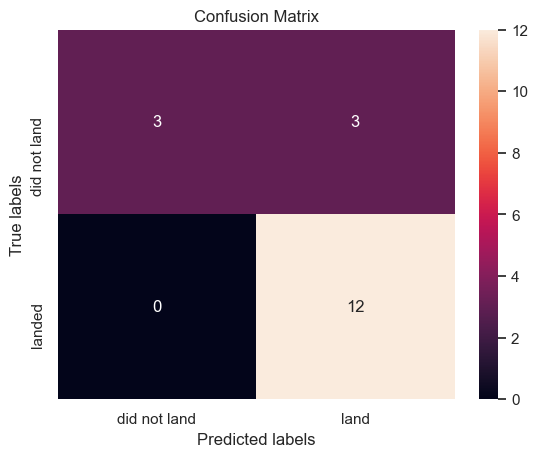

In [88]:
logreg_yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,logreg_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [89]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters).fit(X_train, Y_train) #grid search

In [90]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [91]:
acc_svm_test_data = svm_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_svm_test_data)

Accuracy on test data : 0.8333333333333334


We can plot the confusion matrix 


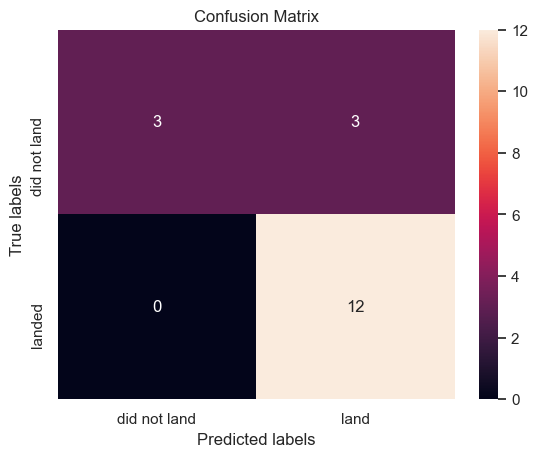

In [92]:
svm_yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [93]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, Y_train) #grid search

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/ana

In [95]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [96]:
acc_tree_test_data = tree_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_tree_test_data)

Accuracy on test data : 0.9444444444444444


We can plot the confusion matrix 


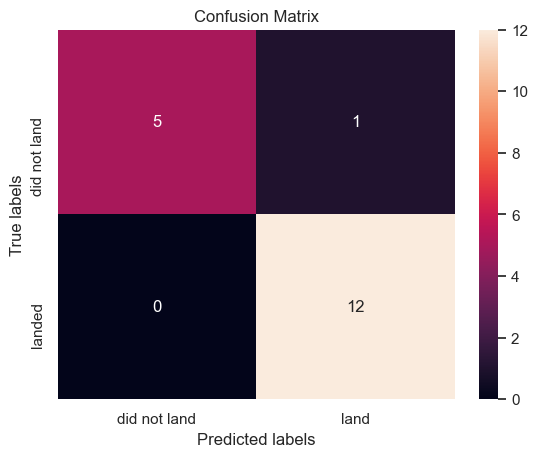

In [97]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,tree_yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [98]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters).fit(X_train, Y_train) #grid search

In [99]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [100]:
acc_knn_test_data = knn_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_knn_test_data)

Accuracy on test data : 0.8333333333333334


We can plot the confusion matrix 


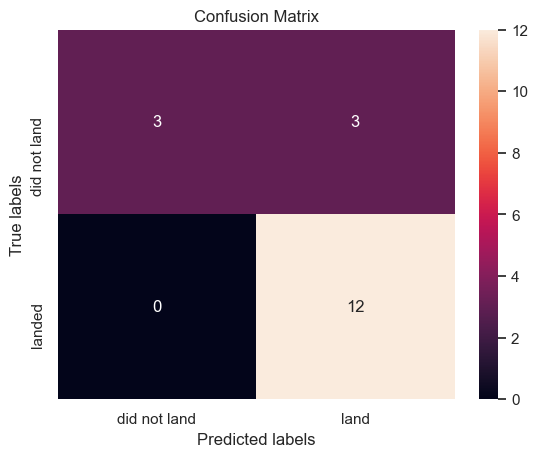

In [101]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)

## TASK  12


Find the method that performs best:
Evaluate it one last time on the test set.
Hence, generalization is now checked by running on unused test data, the holdout set.


In [105]:
methods = ['Logreg','Svm','Tree','Knn']
accs_train = [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]
accs_test = [acc_logreg_test_data, acc_svm_test_data, acc_tree_test_data, acc_knn_test_data]

dict_meth_accs = {}

for i in range(len(methods)):
    dict_meth_accs[methods[i]] = [accs_train[i], accs_test[i]]

df = pd.DataFrame.from_dict(dict_meth_accs, orient='index')
df.rename(columns={0: 'Accuracy Train', 1: 'Accuracy Test'}, inplace = True)

df.head()

,Accuracy Train,Accuracy Test
Logreg,0.846429,0.833333
Svm,0.848214,0.833333
Tree,0.875000,0.944444
Knn,0.848214,0.833333


In [106]:
# Calculating the scores from the test Dataset

#Since we're dealing with binary classification, lets also evaluate using F1 score
#F1 score is usually more useful than accuracy, especially if we have an uneven class distribution. Accuracy 
#works best if false positives and false negatives have similar cost. However, if the cost of false positives and 
#false negatives are different (such as our case) it's better to look at both Precision and Recall.

from sklearn.metrics import f1_score

f1_scores = [
             f1_score(Y_test, logreg_yhat, average='binary'),
             f1_score(Y_test, svm_yhat, average='binary'),
             f1_score(Y_test, tree_yhat, average='binary'),
             f1_score(Y_test, knn_yhat, average='binary'),
            ]

accuracy = [acc_logreg_test_data, acc_svm_test_data, acc_tree_test_data, acc_knn_test_data]

scores = pd.DataFrame(np.array([f1_scores, accuracy]), index=['F1_Score', 'Accuracy'] , columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores



,LogReg,SVM,Tree,KNN
F1_Score,0.888889,0.888889,0.960000,0.888889
Accuracy,0.833333,0.833333,0.944444,0.833333


In [107]:
# Calculating the scores from the whole Dataset

f1_scores = [
             f1_score(Y, logreg_cv.predict(X), average='binary'),
             f1_score(Y, svm_cv.predict(X), average='binary'),
             f1_score(Y, tree_cv.predict(X), average='binary'),
             f1_score(Y, knn_cv.predict(X), average='binary'),
            ]

accuracy = [logreg_cv.score(X, Y), svm_cv.score(X, Y), tree_cv.score(X, Y), knn_cv.score(X, Y)]

scores = pd.DataFrame(np.array([f1_scores, accuracy]),
                      index=['F1_Score', 'Accuracy'],
                      columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores

,LogReg,SVM,Tree,KNN
F1_Score,0.909091,0.916031,0.929134,0.900763
Accuracy,0.866667,0.877778,0.900000,0.855556


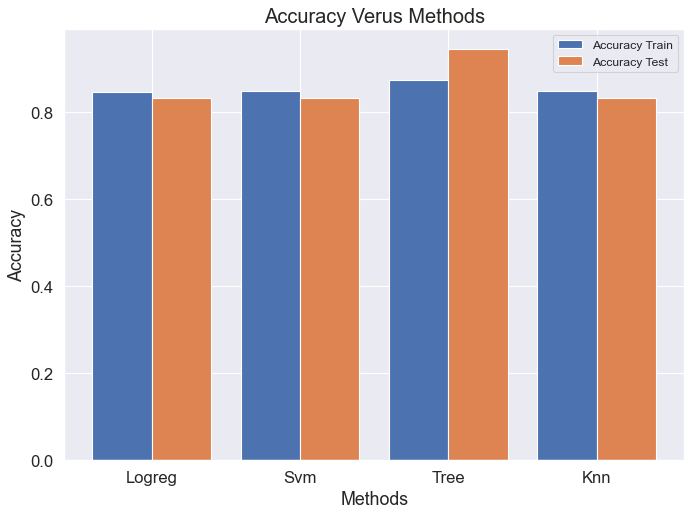

In [108]:
#Plot Multiple Bar Chart 

sns.set(font_scale=1.0)
plt.figure(figsize=(10, 7),dpi=80)

w=0.4
x = ['Logreg','Svm','Tree','Knn']
accuracy_train = df["Accuracy Train"]
accuracy_test = df["Accuracy Test"]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
 
plt.bar(bar1, accuracy_train, w, label='Accuracy Train')
plt.bar(bar2, accuracy_test, w, label='Accuracy Test')

plt.xlabel('Methods', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Verus Methods', fontsize=18)
plt.tick_params(labelsize=15);
plt.xticks(bar1+w/2,x)
plt.legend()

# Display the plot
plt.show()

## Conclusion

As can be seen from the table in Task 12 above, all machine learning models produced the same test accuracy, apart from the decision tree (DT) model. Indicating that they perform reasonably well in terms of predictive accuracy on the test/ unseen data, with the tree model performing slightly better. Accuracy is 0.94 and F1 score is 0.96, on the unseen/ test data. Partly due to the DT model's false positives and false negatives having a similar cost (refer to the Decision Tree Confusion matrix in Task 9 above).  

We can also consider other evaluation metrics or criteria to determine the best model:

**Cross-validation performance**: Instead of relying solely on the test accuracy, we can perform cross-validation to assess the models' performance across multiple train-test splits. We performed this by utilising GridSearchCV above.  This provides a more robust estimation of their generalization performance and helps identify any variations in performance across different data subsets - in this instance (and as can be seen from the multiple bar chart above), the decision tree classifier is the best model

**Interpretability**: We can consider the interpretability of the models. Some models, such as decision trees or linear models, provide more interpretable results compared to complex models like neural networks or ensemble methods. In our case, the Logistic Regression and Decision tree are considered interpretable, unlike SVM and KNN. And the higher the interpretability of a machine learning model, the easier it is for someone to comprehend why certain decisions or predictions have been made. 

**Data**: In general we lack test data, as we only have 18 test samples to work with.  Hence, the test dataset is an unrepresentative sample of data from the domain. Possibly a reason why all the test accuracies are the same.


Overall, the evaluation metrics and criteria may vary depending on our specific problem, data, and objectives of our project. Therefore, it is recommended to consider a combination of metrics and criteria to make an informed decision about the best model, taking into account our specific requirements and constraints.  In our case, **the decision tree method/ model performs the best**, when we take into consideration both accuracy and F1 Score (other evaluation metrics or criteria). 


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-08-31       | 1.1     | Lakshmi Holla   | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
